In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



### Data

In [26]:
from data_preprocessing import DataPreprocessing

data_preprocessing = DataPreprocessing('../dataset/train.csv')
data_preprocessing.load_data()

data_preprocessing.drop_columns(['ID','Customer_ID','Name','SSN','Month','Credit_History_Age'])

data_preprocessing.correct_columns_type()

data_preprocessing.correct_data()

df=data_preprocessing.get_data()

d:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Progress: 100000/100000
 column  Age
mean  33.27456
std  10.764438468297685

 column  Annual_Income
mean  176415.70129814756
std  1429618.0514141466

 column  Monthly_Inhand_Salary
mean  4198.468567818385
std  3187.369878465859

 column  Num_Bank_Accounts
mean  5.36752
std  2.593321480795535

 column  Num_Credit_Card
mean  5.53272
std  2.067503844572637

 column  Interest_Rate
mean  14.53208
std  8.741330275314198

 column  Num_of_Loan
mean  3.53288
std  2.4463562193984765

 column  Delay_from_due_date
mean  21.08191
std  14.84020360602603

 column  Num_of_Delayed_Payment
mean  30.87381
std  219.23509469596328

 column  Changed_Credit_Limit
mean  10.388536914285437
std  6.784096986126221

 column  Num_Credit_Inquiries
mean  27.32105
std  191.29517426043788

 column  Outstanding_Debt
mean  1426.220376000017
std  1155.129025746427

 column  Credit_Utilization_Ratio
mean  32.28517251894346
std  5.116875070150902

 column  Total_EMI_per_month
mean  1403.1182166159347
std  8306.041270321295

In [3]:
categorical_cols = ['Occupation','Credit_Mix','Payment_of_Min_Amount', 'Payment_Behaviour']

# Columns to leave unchanged (same as used during training)
continuous_cols = [ 'Age',
'Annual_Income',
'Monthly_Inhand_Salary', 
'Num_Bank_Accounts',
'Num_Credit_Card',
'Interest_Rate',
'Num_of_Loan',
'Delay_from_due_date',
'Num_of_Delayed_Payment',
'Changed_Credit_Limit',
'Num_Credit_Inquiries',
'Outstanding_Debt',
'Credit_Utilization_Ratio',
'Total_EMI_per_month',
'Amount_invested_monthly',
'Monthly_Balance']

### Utils

In [4]:
def draw_categorical_features_histogram(df, key):
    unique_values = np.unique(df[key])
    num_bins = len(unique_values)

    # Set up a color map for the categories
    color_map = plt.cm.get_cmap('tab10', num_bins)

    # Plot each category separately with a unique color
    for i, value in enumerate(unique_values):
        category_data = df[df[key] == value][key]
        plt.hist(category_data, bins=np.arange(num_bins + 1) - 0.5, width=0.8, align='mid', color=color_map(i), label=str(value), alpha=0.7)


    plt.xlabel('Categories')
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {key}')
    
    # Add a legend
    plt.legend(title=key, title_fontsize='large', fontsize='medium', loc='upper right')

def draw_categorical_features_count_plot(df, key):
    sns.countplot(data=df, x=key,hue='Credit_Score')
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
    plt.title(f'Count plot of {key}')



def draw_categorical_feature(df,feature_name):
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    draw_categorical_features_histogram(df, feature_name)

    plt.subplot(1, 2, 2)
    draw_categorical_features_count_plot(df, feature_name)

    plt.tight_layout()
    plt.show()


######################################################################## Numerical Features ########################################################################
def draw_continuous_features_distribution(df,feature_name):
    # Calculate number of bins using Surges' rule
    num_bins = int(np.ceil(np.log2(len(df[feature_name])) + 1))
    # Plotting the distribution of a feature using Seaborn
    sns.histplot(df[feature_name], bins=num_bins, kde=True, color='skyblue')
    plt.xlabel(f'{feature_name}')
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature_name}')



def draw_continuous_features_KDE (df,feature_name):
    '''
    Draw the Kernel Density Estimate (KDE) plot of a continuous feature in the dataset
    '''
    # Plotting the distribution of a feature using Seaborn
    sns.kdeplot(data=df, x=feature_name, hue='Credit_Score', fill=True, common_norm=False, palette='husl')
    # plot mean values
    mean_values = df.groupby('Credit_Score')[feature_name].mean()
    colors = sns.color_palette('husl', n_colors=len(mean_values)) 

    for credit_score, mean_value in mean_values.items():
        # Get the corresponding color from the palette
        color = colors[df['Credit_Score'].unique().tolist().index(credit_score)]
        plt.axvline(mean_value, color=color, linestyle='--', label=f'Mean {credit_score}: {mean_value:.2f}')
        

    plt.legend(title='Credit Score')
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.title(f'KDE Plot of {feature_name} by Credit Score')
    

def draw_continuous_feature(df,feature_name):
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    draw_continuous_features_distribution(df, feature_name)

    plt.subplot(1, 2, 2)
    draw_continuous_features_KDE(df, feature_name)

    plt.tight_layout()
    plt.show()


######################################################################### Correlation ########################################################################
def draw_continuous_features_correlation_matrix(df):
    # create correlation matrix for numerical features
    corr = df[continuous_cols].corr()
    # plot the correlation matrix
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

### Features Analysis

#### Categorical Features

##### 1. Occupation

Represents the occupation of the person it is the type of job or profession that the individual is engaged in

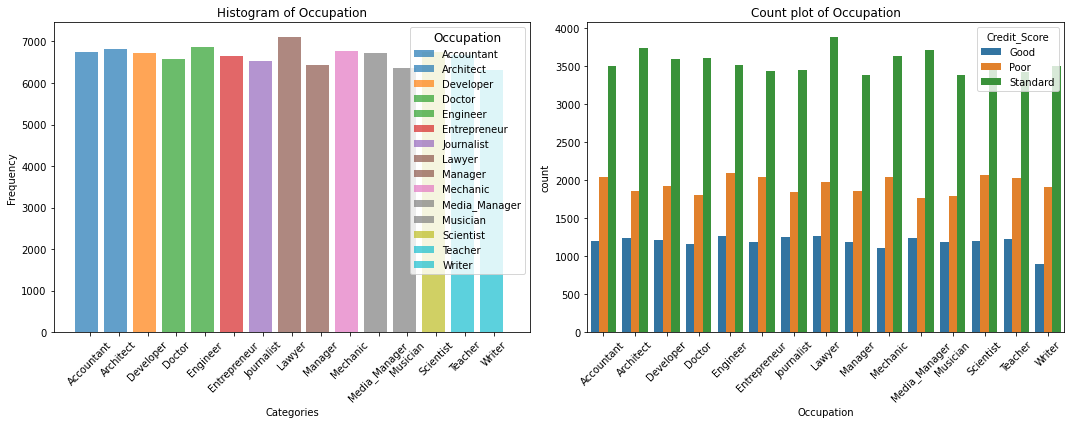

In [5]:
draw_categorical_feature(df,feature_name='Occupation')


##### 💭💭 Same Distribution of credit Score across different occupation groups ==> occupation isn't an effective feature No need to consider occupation in the model    

##### 2. Credit_Mix

"Credit_Mix" refers to the variety of credit types that an individual has in their credit profile. Lenders and credit scoring models consider credit mix as one of the factors when assessing creditworthiness.

Having diversity in the types of credit accounts demonstrates to lenders that the individual can manage various financial obligations responsibly. It shows that the borrower has experience handling different types of credit and can effectively manage payments and balances across a variety of accounts. This diversity can positively impact credit scores and creditworthiness assessments.

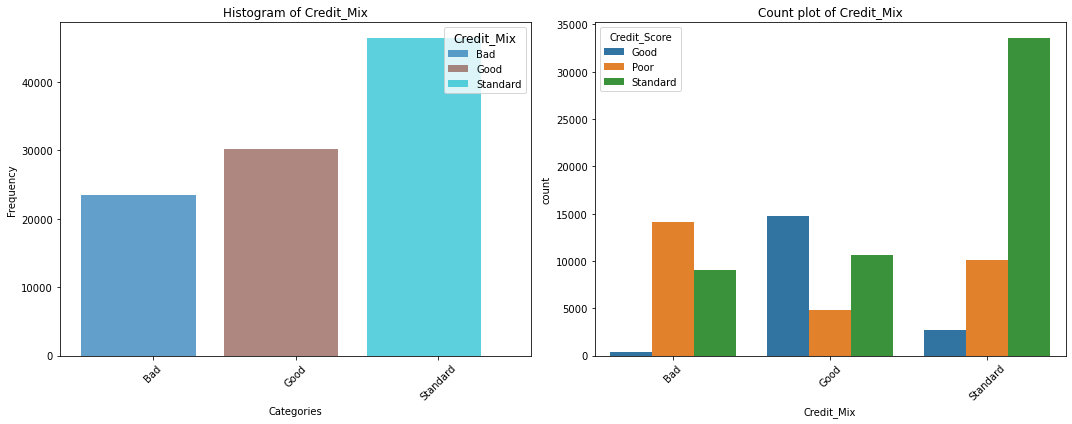

In [6]:
draw_categorical_feature(df,feature_name='Credit_Mix')

##### 💭💭

##### 3. Payment of Min Amount

Payment_of_Min_Amount" likely represents whether a customer has made the minimum required payment on their financial obligation, such as a credit card bill or loan installment.

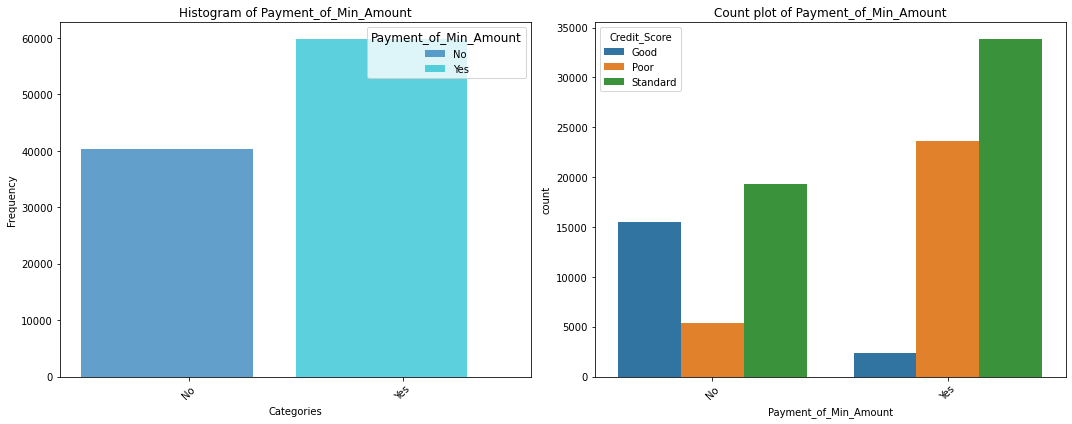

In [7]:
draw_categorical_feature(df,feature_name='Payment_of_Min_Amount')

##### 4. Payment Behaviour

"Payment_Behavior" typically does not refer to an amount expressed in USD. Instead, it usually represents the pattern or history of how a customer makes payments on their financial obligations. This includes things like credit card bills, loan payments, utility bills, and other recurring expenses.

It seems like "Payment_Behavior" in this context is being categorized based on spending behavior and the value of payments made. Each category describes a different pattern of spending behavior and the size of payments. Here's how each category can be understood:

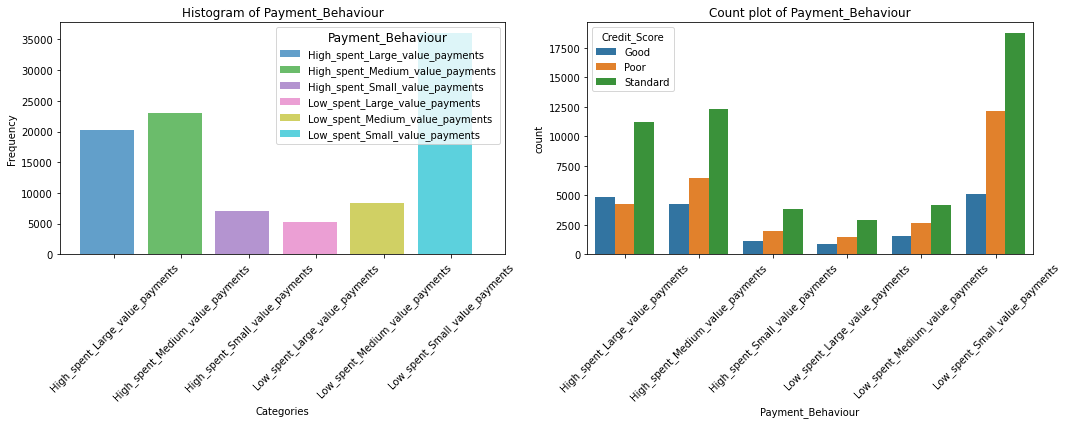

In [8]:
draw_categorical_feature(df,feature_name='Payment_Behaviour')

##### 💭💭

#### Numerical Features

##### 1. Age

Age of Customer

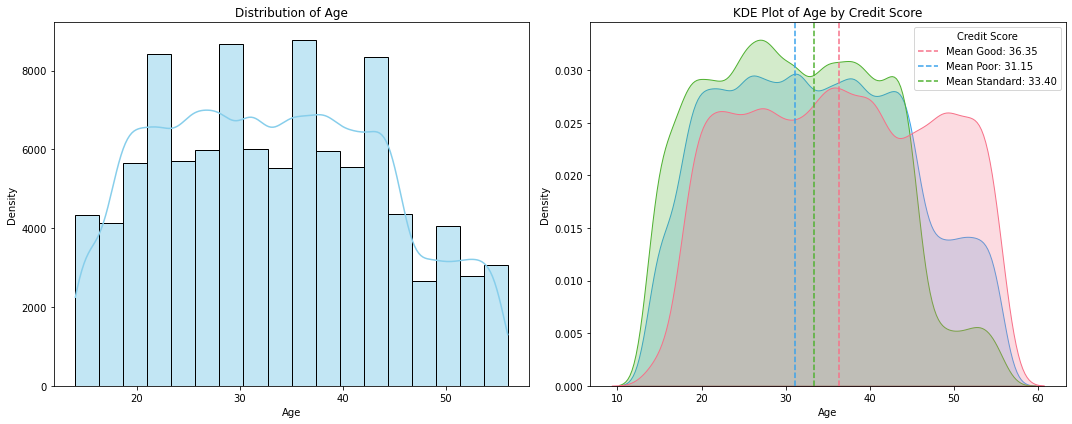

In [9]:
draw_continuous_feature(df,feature_name='Age')


###### 💭💭

##### 2. Annual Income

 Represents the annual income of the person

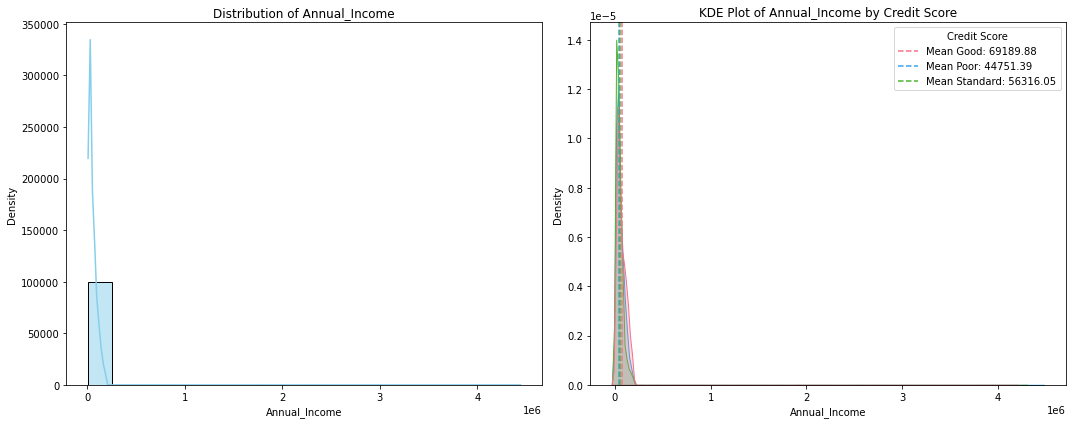

In [10]:
draw_continuous_feature(df,feature_name='Annual_Income') 

##### 3. Monthly Inhand Salary

Represents the monthly base salary of a person

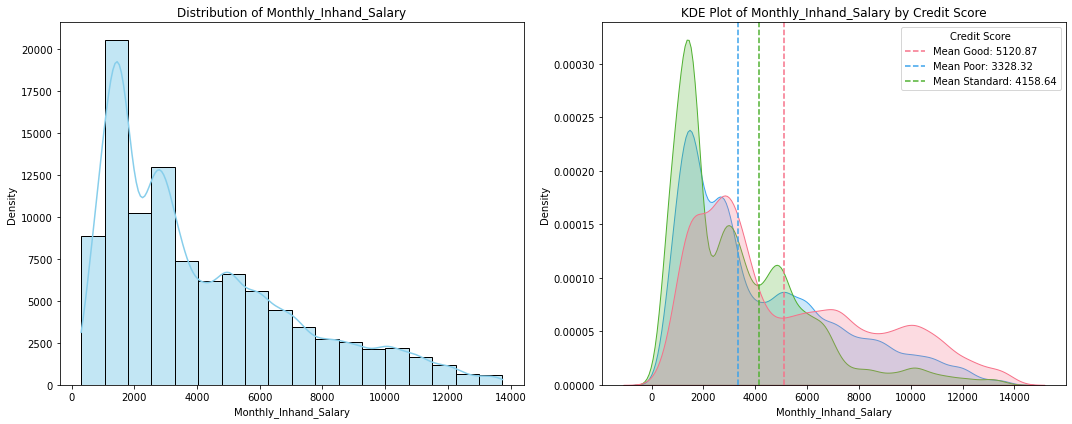

In [11]:
draw_continuous_feature(df,feature_name='Monthly_Inhand_Salary')

##### 4. Num Bank Accounts

Represents the number of bank accounts a person holds

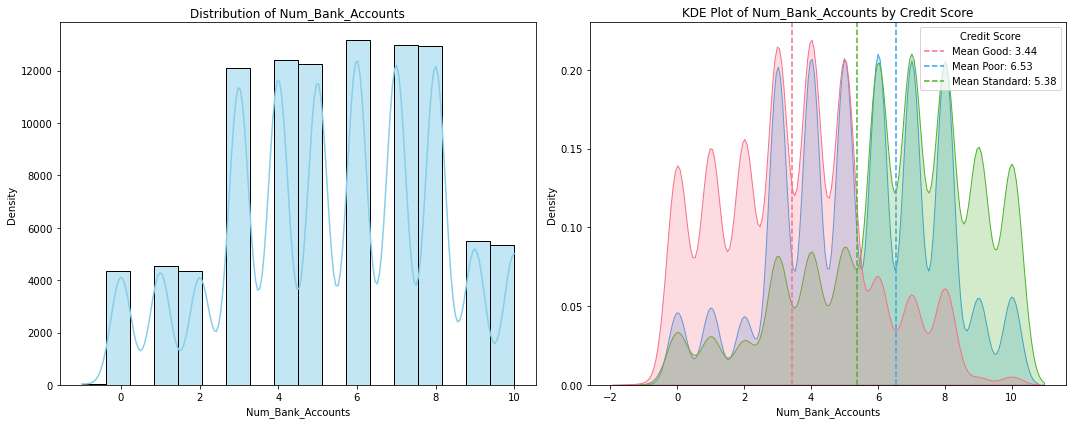

In [12]:
draw_continuous_feature(df,feature_name='Num_Bank_Accounts')

##### 5. Num Credit Card

Represents the number of other credit cards held by a person

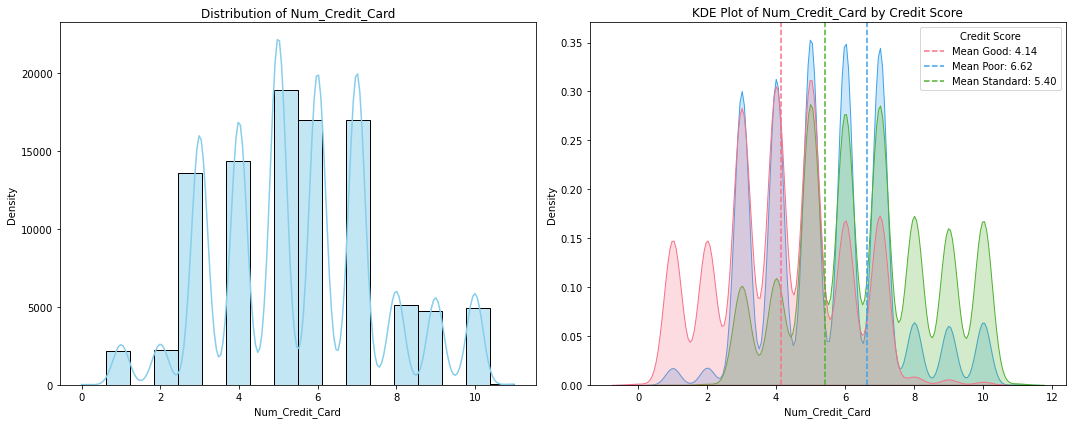

In [13]:
draw_continuous_feature(df,feature_name='Num_Credit_Card')

##### 6. Interest Rate

Represents the interest rate on credit card

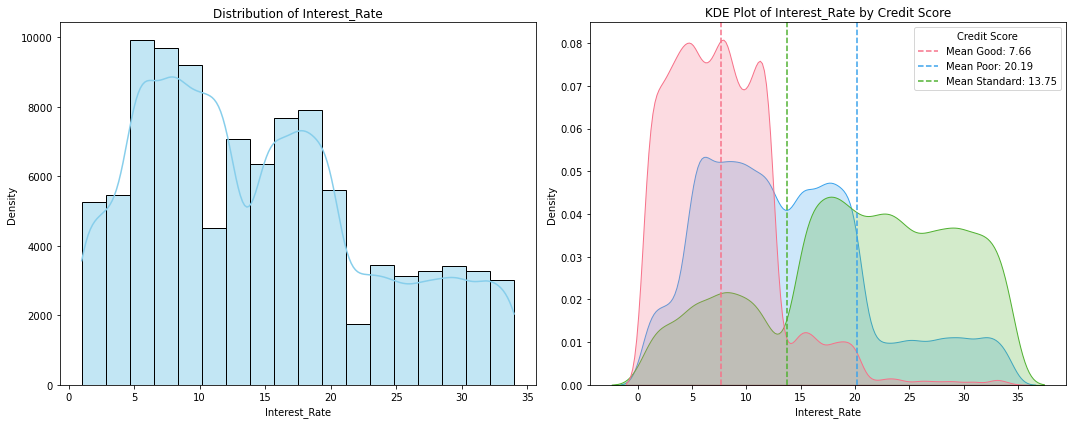

In [14]:
draw_continuous_feature(df,feature_name='Interest_Rate')

##### 7. Num of Loan

Represents the number of loans taken from the bank

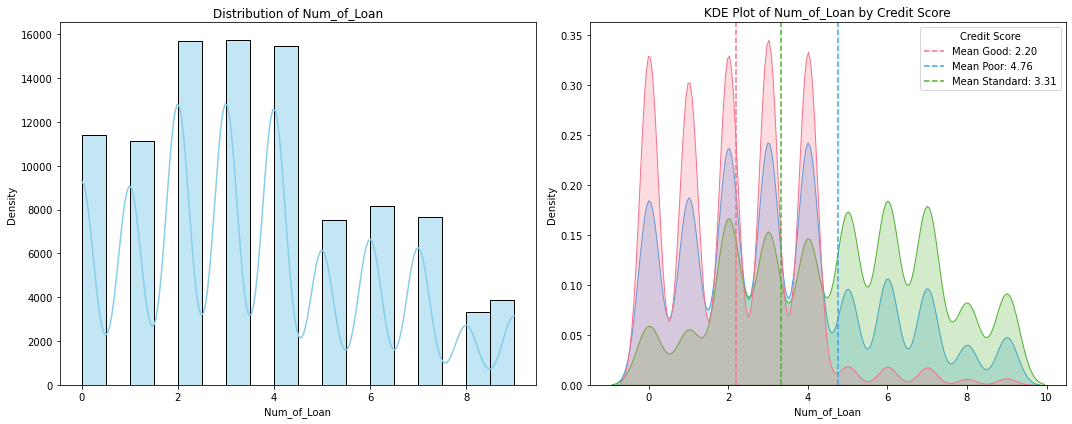

In [15]:
draw_continuous_feature(df,feature_name='Num_of_Loan')

##### 8. Delay from due date

Represents the average number of days delayed from the payment date

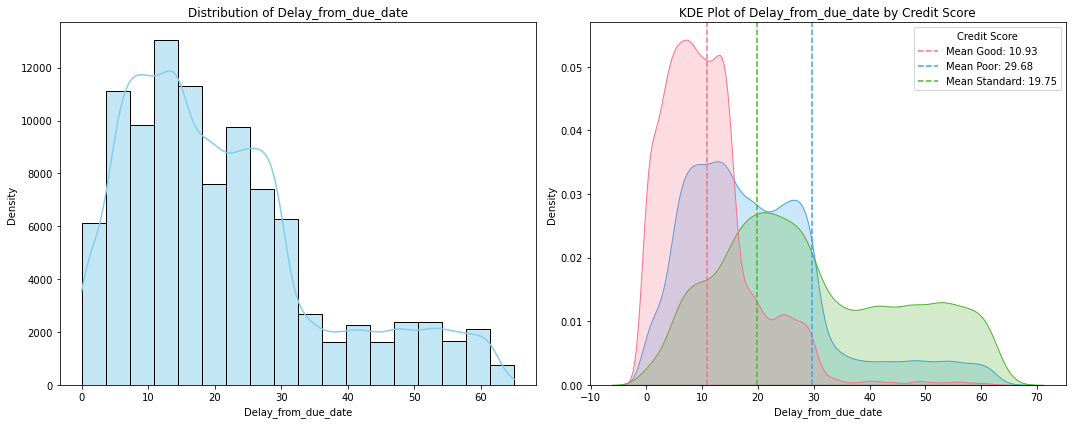

In [16]:
draw_continuous_feature(df,feature_name='Delay_from_due_date')

##### 9. Num of Delayed Payment

Represents the average number of payments delayed by a person

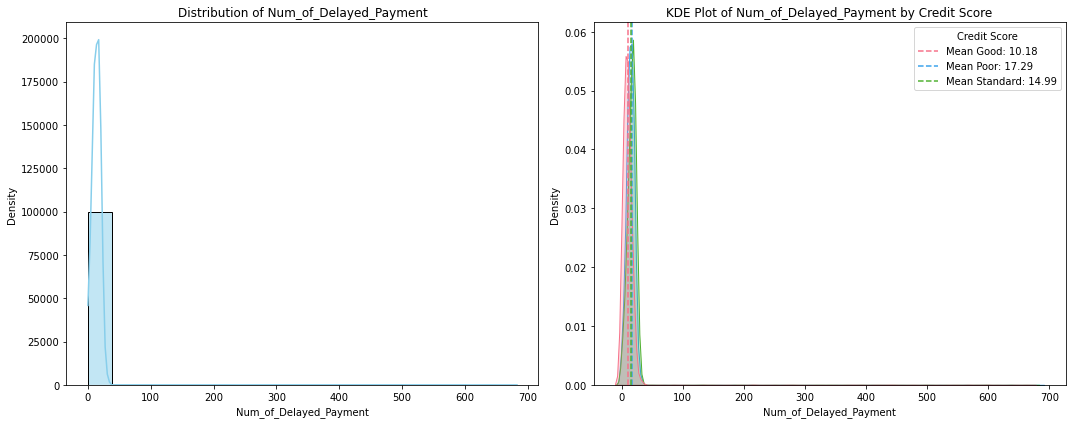

In [17]:
draw_continuous_feature(df,feature_name='Num_of_Delayed_Payment')

##### 10. Changed Credit Limit

Represents the percentage change in credit card limit

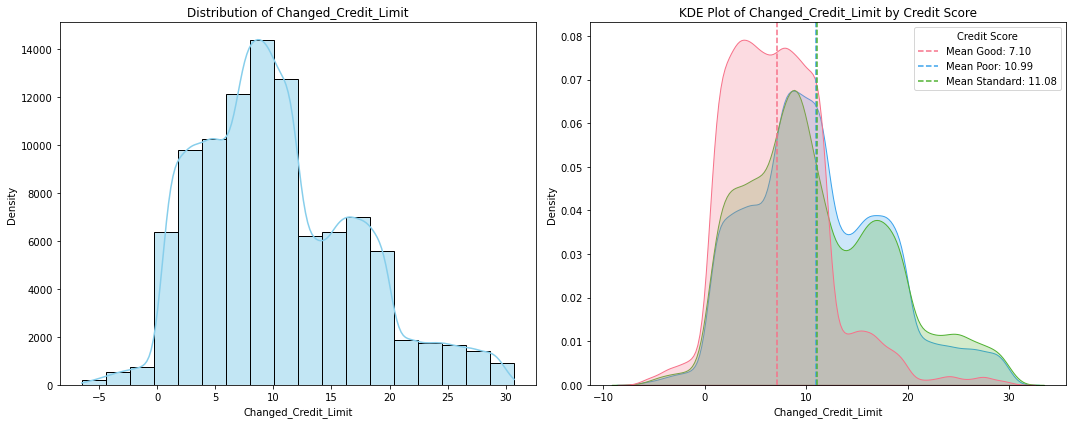

In [18]:
draw_continuous_feature(df,feature_name='Changed_Credit_Limit')

##### 11. Num Credit Inquiries

Represents the number of credit card inquiries
The term "credit card inquiries" typically refers to requests made by individuals to obtain new credit cards

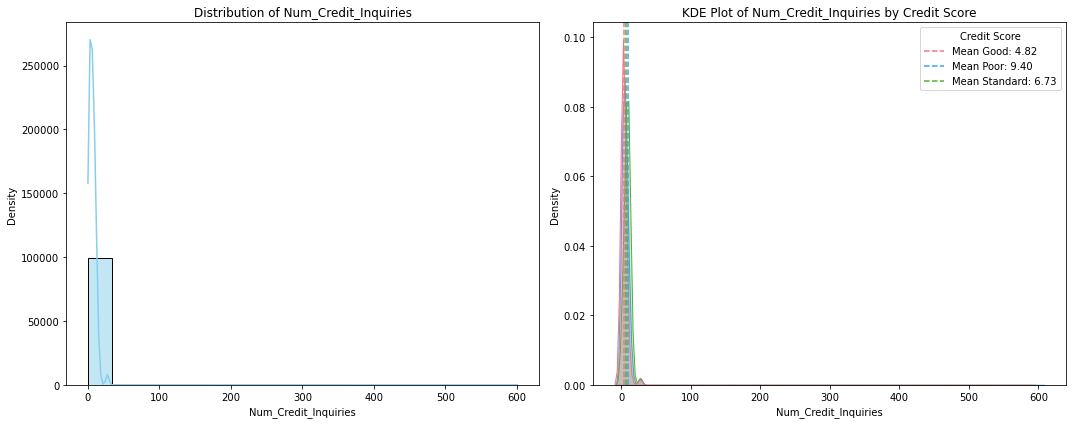

In [19]:
draw_continuous_feature(df,feature_name='Num_Credit_Inquiries')

##### 12. Outstanding_Debt

Represents the remaining debt to be paid (in USD)

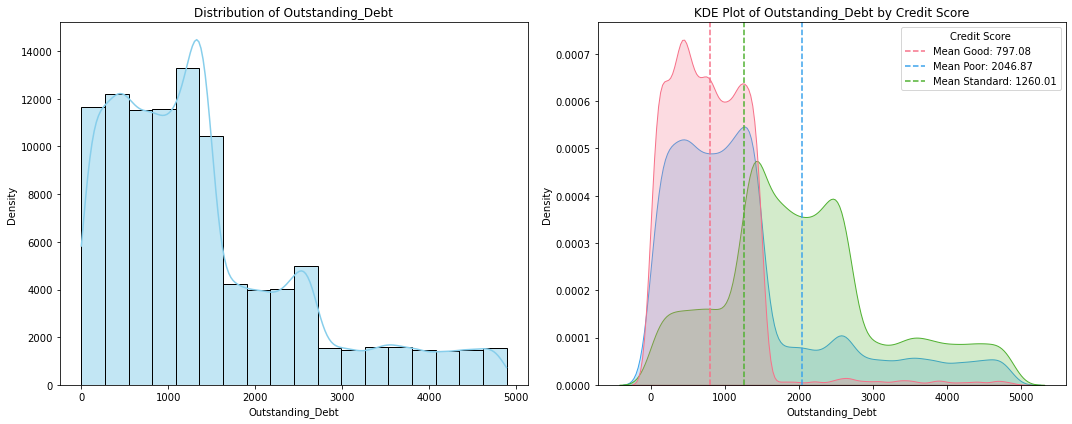

In [20]:
draw_continuous_feature(df,feature_name='Outstanding_Debt')

##### 13. Credit Utilization Ratio

Represents the utilization ratio of credit card

The utilization ratio of a credit card refers to the percentage of the available credit that a cardholder has used. It's calculated by dividing the balance on the card by the credit limit and multiplying by 100 to get a percentage.

For example, if you have a credit card with a $1,000 limit and you currently have a balance of $300 on it, your utilization ratio would be 30% ($300 / $1,000 * 100 = 30%).

To be clearer "a balance of $300," it means there is currently $300 outstanding on the credit card. This represents the amount of money that has been borrowed but not yet repaid to the credit card issuer. This balance is subject to interest charges if not paid off in full by the due date on the credit card statement.

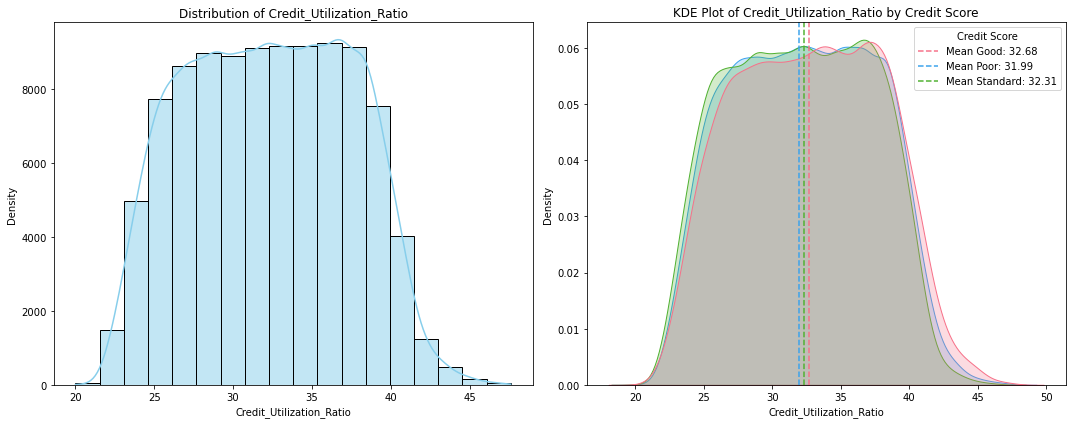

In [21]:
draw_continuous_feature(df,feature_name='Credit_Utilization_Ratio')

##### 14. Total EMI per month


EMI stands for Equated Monthly Installment. It's a fixed payment amount made by a borrower to a lender at a specified date each month. This payment typically consists of both principal and interest components, allowing the borrower to repay a loan over a predetermined period in regular, manageable installments.

"القسط الشهري" translates to "monthly installment" in English, which is essentially what EMI (Equated Monthly Installment) stands for. It refers to the fixed amount of money that a borrower pays to a lender on a monthly basis to repay a loan, typically consisting of both principal and interest portions.

For instance, if someone has multiple loans such as a home loan, car loan, and personal loan, each with its own monthly EMI amount, the "Total_EMI_per_month" would be the cumulative amount of all these individual EMIs. This total gives a comprehensive picture of the monthly financial commitment towards loan repayments.

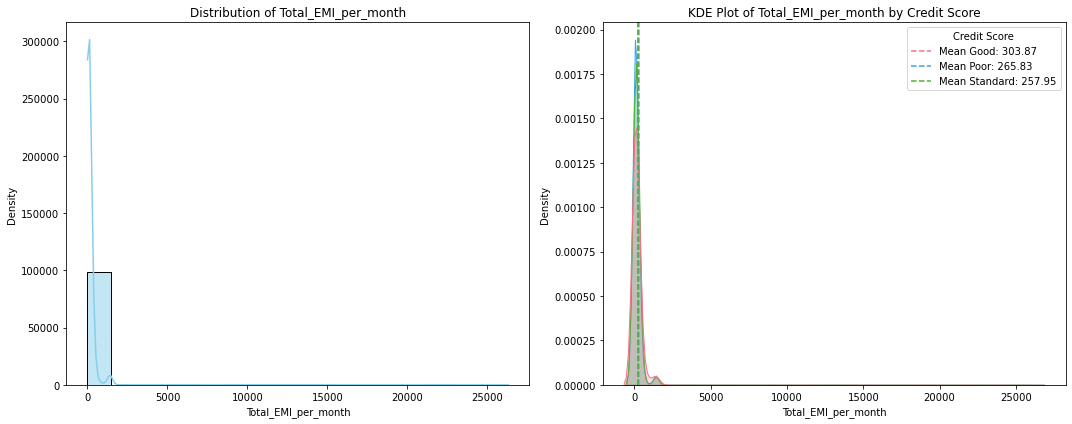

In [22]:
draw_continuous_feature(df,feature_name='Total_EMI_per_month')

##### 15. Amount invested monthly

"Amount_invested_monthly" represents the sum of money that a customer invests or sets aside each month, denoted in US dollars (USD). This could refer to regular contributions made to savings accounts, investment accounts, retirement funds, or any other form of investment vehicle. It indicates the amount of money allocated from the customer's income or savings towards investment purposes on a monthly basis.

It typically refers to the monthly cash deposit or contribution made by the customer into an investment or savings account at a bank or financial institution.

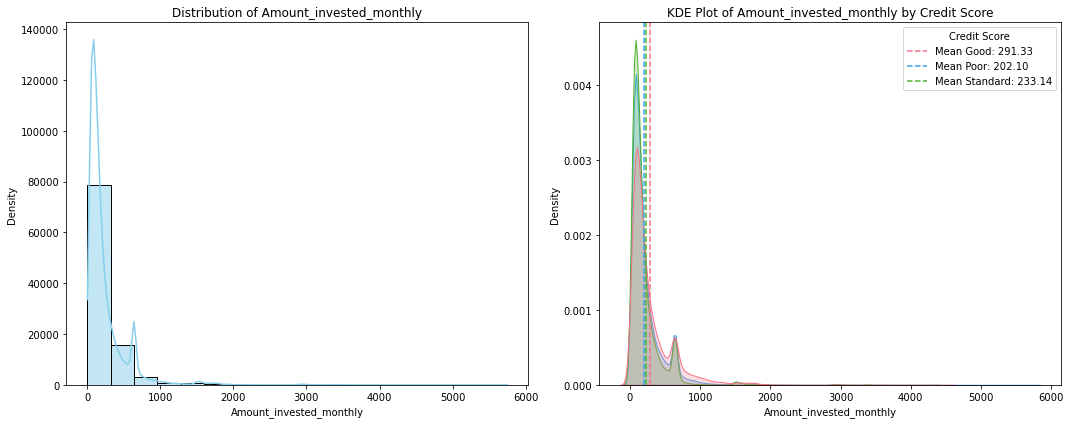

In [23]:
draw_continuous_feature(df,feature_name='Amount_invested_monthly')

##### 16. Monthly Balance

"Monthly_Balance" refers to the total amount of funds or money that a customer has in their account at the end of each month, expressed in US dollars (USD). This balance reflects the cumulative result of all financial transactions within the account for that particular month, including deposits, withdrawals, interest accruals, and any other relevant activities. It provides a snapshot of the customer's financial position at the end of the monthly reporting period.

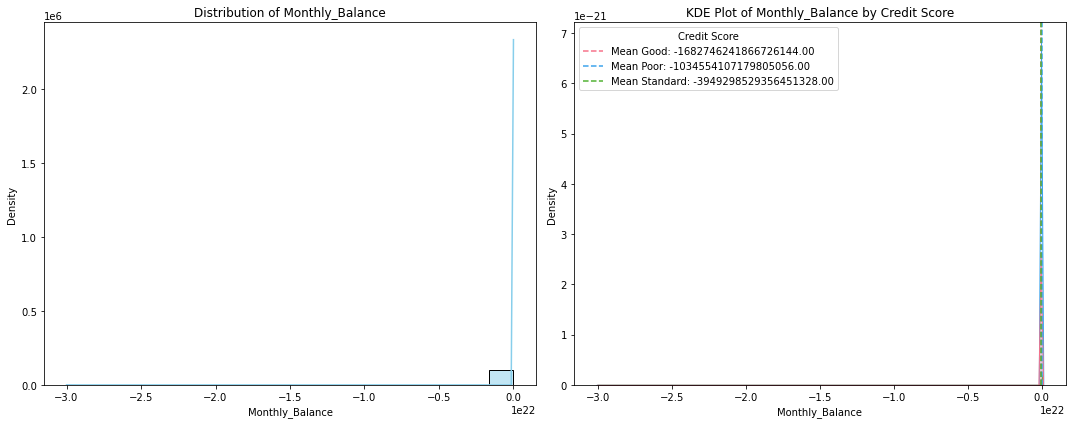

In [24]:
draw_continuous_feature(df,feature_name='Monthly_Balance')

#### Correlation Analysis

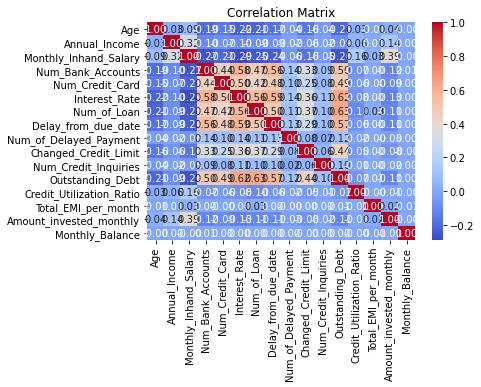

In [25]:
draw_continuous_features_correlation_matrix(df)

From the graph it is clear that num_of_bank_accounts, num_of_credit_cards , interest_rate and delay_from_due_date are the most features correlated with each other than other features.

. Num of Banks accounts and num of credit cards are correlated with each other which is logic as no of accounts are more the customer will have more credit cards [0.44] 😉
. Num of Banks accounts and Interest Rate are correlated with each other  [0.58] ***

. Num of Credit Cards and Interest Rate are correlated the more cards the person has the more outstanding balanced he will be outstanding so the interest rate increases[0.50]

. Num of Banks accounts & Num of Credit Cards both are correlated with Delay From Due Date are as no of bank accounts/credit cards increases the outstanding balance increase so the customer is more likely to miss the due date  [0.56] [0.48]

. Interest Rate and Delay From Due Date are correlated with each other as the delay from due date increases the bank needs to apply like a penalty so as a result the interest rate increases [0.59]